# Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime, timedelta

In [2]:
dateparse = lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

In [3]:
train = pd.read_csv("./Data/merged.csv", parse_dates=['AOBT','ATOT'], date_parser=dateparse)

In [4]:
train.shape

(543813, 33)

In [5]:
train

,Aircraft_Model,AOBT,ATOT,Stand,Runway,AOBT_hour,AOBT_minute,AOBT_year,AOBT_month,AOBT_day,...,pressure,windSpeed,windGust,windBearing,cloudCover,uvIndex,visibility,precipType,precipAccumulation,ozone
0,B737-800 WINGLETS,2015-01-01 05:56:00,2015-01-01 06:05:00,STAND_62,RUNWAY_4,5,56,2015,1,1,...,1031.6,10.29,11.39,210.0,0.75,0.0,5.859,None,0.0,310.4
1,A320-100/200,2015-01-01 06:08:00,2015-01-01 06:18:00,STAND_153,RUNWAY_4,6,8,2015,1,1,...,1031.6,10.29,11.39,210.0,0.75,0.0,5.859,None,0.0,310.4
2,A320-100/200,2015-01-01 06:08:00,2015-01-01 06:19:00,STAND_44,RUNWAY_2,6,8,2015,1,1,...,1031.6,10.29,11.39,210.0,0.75,0.0,5.859,None,0.0,310.4
3,A320-100/200,2015-01-01 06:24:00,2015-01-01 06:36:00,STAND_7,RUNWAY_3,6,24,2015,1,1,...,1031.6,10.29,11.39,210.0,0.75,0.0,5.859,None,0.0,310.4
4,A319,2015-01-01 06:14:00,2015-01-01 06:27:00,STAND_17,RUNWAY_2,6,14,2015,1,1,...,1031.6,10.29,11.39,210.0,0.75,0.0,5.859,None,0.0,310.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543808,A350-900,2018-12-31 21:02:00,2018-12-31 21:20:00,STAND_150,RUNWAY_3,21,2,2018,12,31,...,1017.3,7.62,27.73,262.0,1.00,0.0,6.216,None,0.0,310.4
543809,B787-900,2018-12-31 21:24:00,2018-12-31 21:38:00,STAND_77,RUNWAY_1,21,24,2018,12,31,...,1017.3,9.18,27.73,281.0,1.00,0.0,6.216,None,0.0,310.4
543810,A330-200,2018-12-31 22:27:00,2018-12-31 22:37:00,STAND_120,RUNWAY_1,22,27,2018,12,31,...,1017.3,9.18,27.73,281.0,1.00,0.0,6.216,None,0.0,310.4
543811,B787-800 Dreamliner,2018-12-31 22:09:00,2018-12-31 22:29:00,STAND_49,RUNWAY_2,22,9,2018,12,31,...,1017.3,9.18,27.73,281.0,1.00,0.0,6.216,None,0.0,310.4


# EDA
## Distribution of targets

In [6]:
train['taxi_seconds'].describe()

count    543813.000000
mean       1125.287112
std         490.325000
min      -13080.000000
25%         840.000000
50%        1080.000000
75%        1320.000000
max       39360.000000
Name: taxi_seconds, dtype: float64

In [7]:
datetime_targets= train[["AOBT", "taxi_seconds"]]

In [8]:
datetime_targets.set_index("AOBT", inplace=True)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='taxi_seconds'>

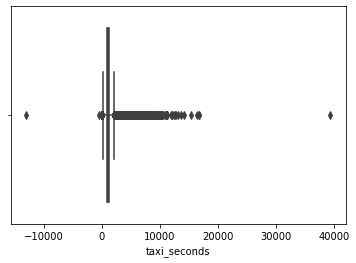

In [9]:
# Plot the outliers (>30000 and <0)
sns.boxplot(datetime_targets['taxi_seconds'])

In [10]:
cut_bins = [0, 500, 1000, 1500, 2000, 5000, 10000, 39360]
datetime_targets['taxi_seconds']= pd.cut(datetime_targets['taxi_seconds'], bins=cut_bins)
datetime_targets['taxi_seconds'].value_counts(sort=False)

<ipython-input-10-30a38c69cae8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datetime_targets['taxi_seconds']= pd.cut(datetime_targets['taxi_seconds'], bins=cut_bins)


(0, 500]           12788
(500, 1000]       217575
(1000, 1500]      244868
(1500, 2000]       50864
(2000, 5000]       16812
(5000, 10000]        703
(10000, 39360]        33
Name: taxi_seconds, dtype: int64

Text(0.5, 1.0, 'Time series analysis of taxi-off time (Year)')

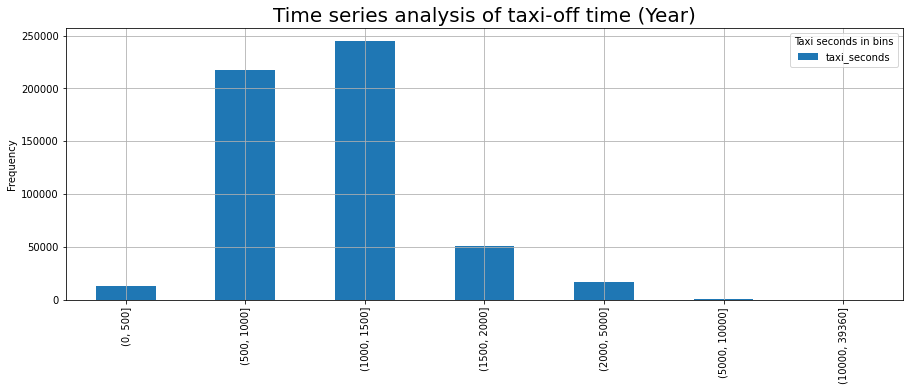

In [11]:
datetime_targets.taxi_seconds.value_counts(sort=False).plot(kind="bar", figsize=(15, 5), grid=True)
plt.ylabel('Frequency')
plt.legend(loc='upper right', title='Taxi seconds in bins')
plt.title('Time series analysis of taxi-off time (Year)', fontsize=20)

## Analyse the targets over time

In [12]:
dummy_targets = pd.get_dummies(datetime_targets["taxi_seconds"])

In [13]:
dummy_targets

,"(0, 500]","(500, 1000]","(1000, 1500]","(1500, 2000]","(2000, 5000]","(5000, 10000]","(10000, 39360]"
AOBT,,,,,,,
2015-01-01 05:56:00,0,1,0,0,0,0,0
2015-01-01 06:08:00,0,1,0,0,0,0,0
2015-01-01 06:08:00,0,1,0,0,0,0,0
2015-01-01 06:24:00,0,1,0,0,0,0,0
2015-01-01 06:14:00,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
2018-12-31 21:02:00,0,0,1,0,0,0,0
2018-12-31 21:24:00,0,1,0,0,0,0,0
2018-12-31 22:27:00,0,1,0,0,0,0,0


Text(0.5, 1.0, 'Time series analysis of taxi-off time (Year)')

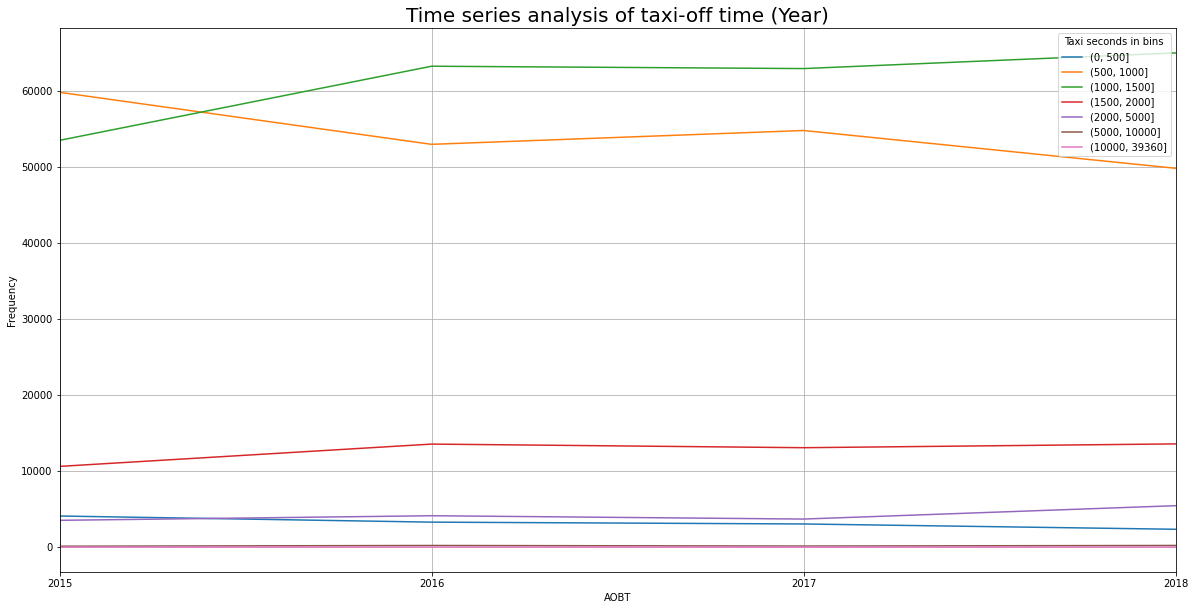

In [14]:
dummy_targets.resample("y").agg("sum").plot(figsize=(20, 10), grid=True)
plt.ylabel('Frequency')
plt.legend(loc='upper right', title='Taxi seconds in bins')
plt.title('Time series analysis of taxi-off time (Year)', fontsize=20)

In [15]:
dummy_targets.resample("y").agg("sum")

,"(0, 500]","(500, 1000]","(1000, 1500]","(1500, 2000]","(2000, 5000]","(5000, 10000]","(10000, 39360]"
AOBT,,,,,,,
2015-12-31,4097.0,59862.0,53539.0,10627.0,3528.0,121.0,7.0
2016-12-31,3290.0,53014.0,63296.0,13563.0,4134.0,218.0,11.0
2017-12-31,3049.0,54835.0,62986.0,13087.0,3695.0,144.0,6.0
2018-12-31,2352.0,49864.0,65047.0,13587.0,5455.0,220.0,9.0


<AxesSubplot:xlabel='AOBT'>

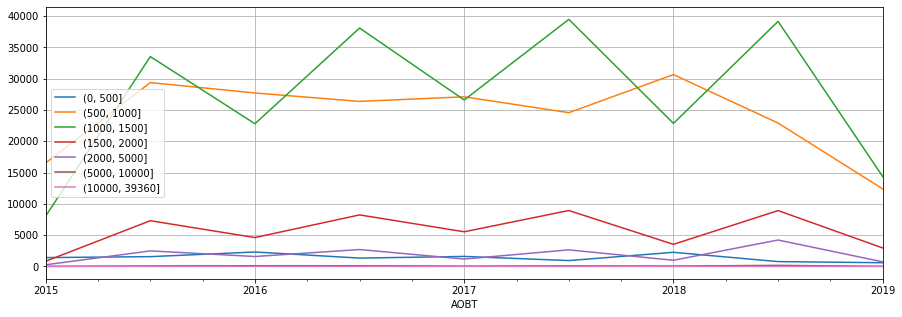

In [16]:
dummy_targets.resample("2Q").agg("sum").plot(figsize=(15, 5), grid=True)


Text(0.5, 1.0, 'Time series analysis of taxi-off time (Month)')

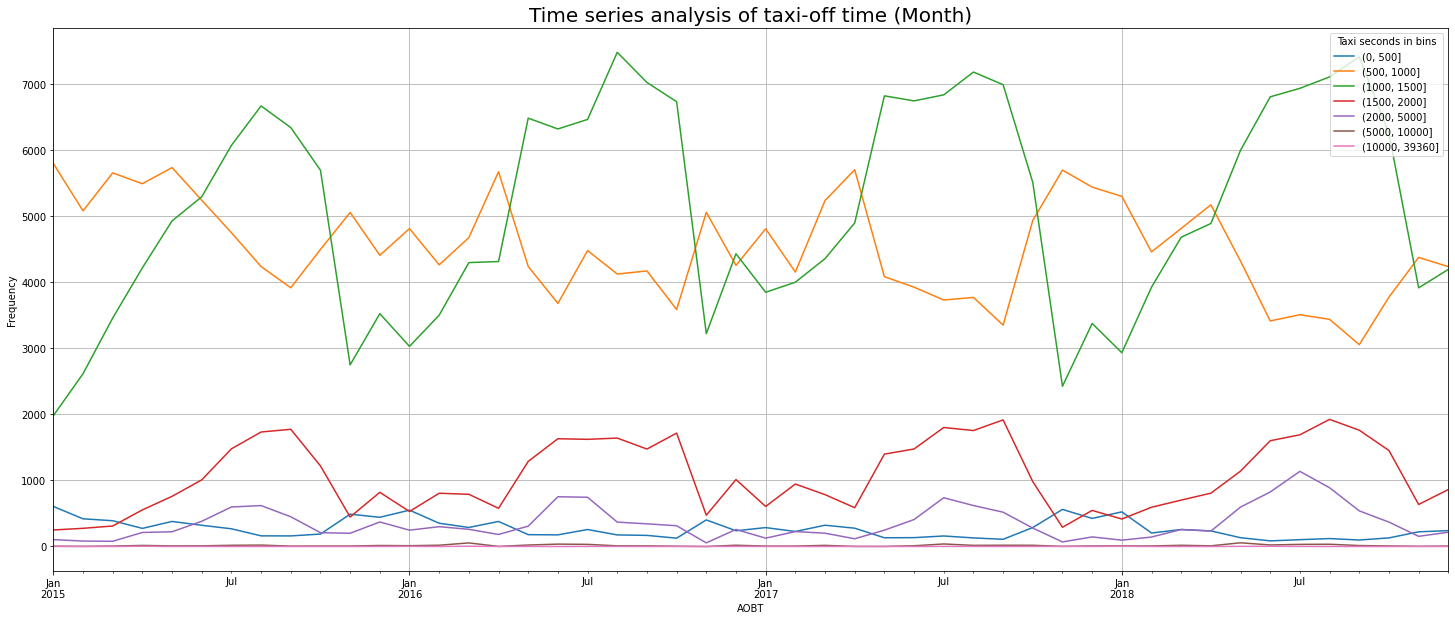

In [17]:
dummy_targets.resample("m").agg("sum").plot(figsize=(25, 10), grid=True)
plt.ylabel('Frequency')
plt.legend(loc='upper right', title='Taxi seconds in bins')
plt.title('Time series analysis of taxi-off time (Month)', fontsize=20)

Text(0.5, 1.0, 'Time series analysis of taxi-off time')

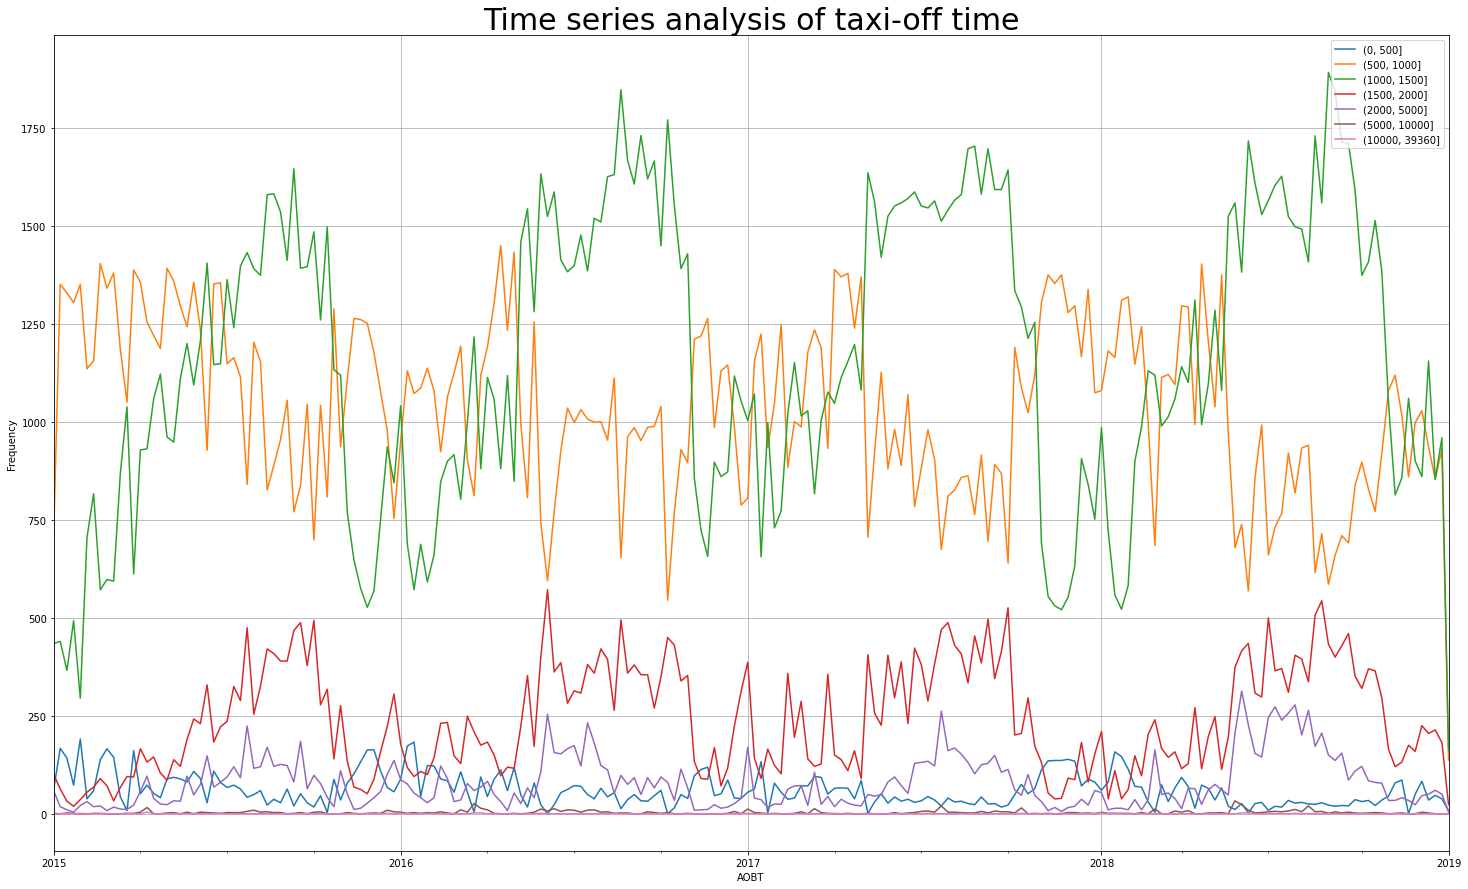

In [63]:
dummy_targets.resample("w").agg("sum").plot(figsize=(25, 15), grid=True)
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.title('Time series analysis of taxi-off time', fontsize=30)

## Correlation Matrix

<AxesSubplot:>

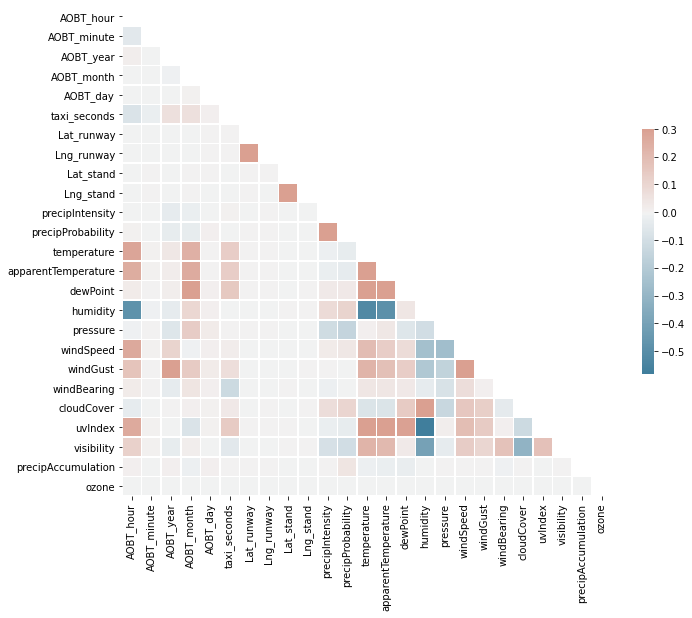

In [19]:
# Compute the correlation matrix
corr = train.corr()


mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Categorical variables

In [20]:
# remove outliers before analysis
train = train[train["taxi_seconds"] > -100]
train = train[train["taxi_seconds"] < 30000]

In [21]:
train.shape

(543810, 33)

Text(0.5, 1.0, 'Number of flights per year')

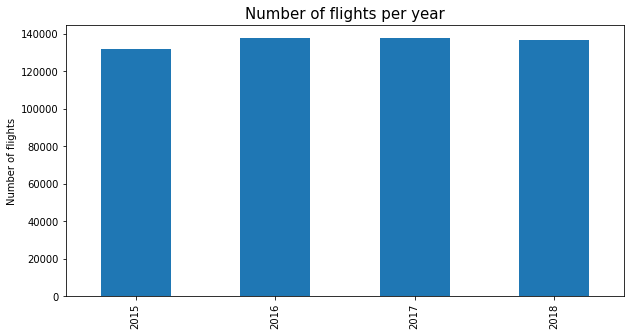

In [43]:
# how many flights departing per year
train['AOBT_year'].value_counts(sort=False).plot(kind="bar",figsize=(10, 5), grid=False)
plt.ylabel('Number of flights')
plt.title('Number of flights per year', fontsize=15)

Text(0.5, 1.0, 'Usage rate of each runway')

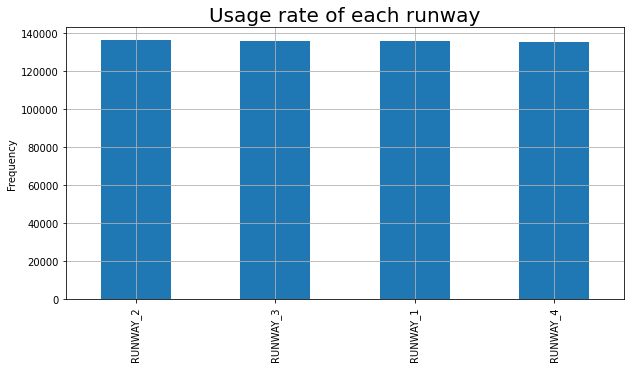

In [23]:
# Distribution of runway usage
train['Runway'].value_counts().plot(kind="bar",figsize=(10, 5), grid=True)
plt.ylabel('Frequency')
plt.title('Usage rate of each runway', fontsize=20)

In [24]:
train.groupby('AOBT_year', as_index=False).mean()

,AOBT_year,AOBT_hour,AOBT_minute,AOBT_month,AOBT_day,taxi_seconds,Lat_runway,Lng_runway,Lat_stand,Lng_stand,...,humidity,pressure,windSpeed,windGust,windBearing,cloudCover,uvIndex,visibility,precipAccumulation,ozone
0,2015,11.997618,29.416065,6.657348,15.753573,1073.154549,54.758770,-0.004785,54.767046,0.009481,...,0.783150,1017.165950,7.100048,8.973235,195.852643,0.497026,1.486170,5.781179,0.000000e+00,310.4
1,2016,12.152287,29.382233,6.650314,15.779604,1134.762663,54.758771,-0.004736,54.767054,0.009502,...,0.794460,1016.025239,6.132242,8.113288,193.738518,0.497824,1.437688,5.762700,0.000000e+00,310.4
2,2017,12.204804,29.380161,6.556192,15.703886,1120.812397,54.758778,-0.004720,54.767045,0.009472,...,0.790729,1016.350797,6.767749,8.343497,212.912245,0.487878,1.456641,5.711188,8.161696e-07,310.4
3,2018,12.218568,29.331334,6.594841,15.724324,1170.412108,54.758769,-0.004800,54.767045,0.009498,...,0.769644,1015.251653,8.273271,18.603245,179.279462,0.503619,1.469780,5.701199,5.343204e-06,310.4


In [57]:
train.groupby('AOBT_year')['icon'].describe()

,count,unique,top,freq
AOBT_year,,,,
2015,131816,8,partly-cloudy-day,60058
2016,137589,8,partly-cloudy-day,62907
2017,137839,8,partly-cloudy-day,61173
2018,136566,9,clear-day,99061


In [62]:
train.groupby(['AOBT_year', 'icon']).count()

Aircraft_Model   AOBT   ATOT  Stand  Runway  \
AOBT_year icon                                                               
2015      clear-day                     28447  28447  28447  28447   28447   
          clear-night                   11661  11661  11661  11661   11661   
          cloudy                         5331   5331   5331   5331    5331   
          fog                            2597   2597   2597   2597    2597   
          partly-cloudy-day             60058  60058  60058  60058   60058   
          partly-cloudy-night           20831  20831  20831  20831   20831   
          rain                           2832   2832   2832   2832    2832   
          wind                             59     59     59     59      59   
2016      clear-day                     27411  27411  27411  27411   27411   
          clear-night                   13820  13820  13820  13820   13820   
          cloudy                         7998   7998   7998   7998    7998   
          fog                            4076   4076   4076   4076    4076   
          partly-cloudy-day             62907  62907  62907  62907   62907   
          partly-cloudy-night           18889  18889  18889  18889   18889   
          rain                           2373   2373   2373   2373    2373   
          wind                            115    115    115    115     115   
2017      clear-day                     31101  31101  31101  31101   31101   
          clear-night                   12770  12770  12770  12770   12770   
          cloudy                         7787   7787   7787   7787    7787   
          fog                            4319   4319   4319   4319    4319   
          partly-cloudy-day             61173  61173  61173  61173   61173   
          partly-cloudy-night           18620  18620  18620  18620   18620   
          rain                           1914   1914   1914   1914    1914   
          wind                            155    155    155    155     155   
2018      clear-day                     99061  99061  99061  99061   99061   
          clear-night                    4594   4594   4594   4594    4594   
          cloudy                         2938   2938   2938   2938    2938   
          fog                            1990   1990   1990   1990    1990   
          partly-cloudy-day             19501  19501  19501  19501   19501   
          partly-cloudy-night            6683   6683   6683   6683    6683   
          rain                           1619   1619   1619   1619    1619   
          snow                             24     24     24     24      24   
          wind                            156    156    156    156     156   

                               AOBT_hour  AOBT_minute  AOBT_month  AOBT_day  \
AOBT_year icon                                                                
2015      clear-day                28447        28447       28447     28447   
          clear-night              11661        11661       11661     11661   
          cloudy                    5331         5331        5331      5331   
          fog                       2597         2597        2597      2597   
          partly-cloudy-day        60058        60058       60058     60058   
          partly-cloudy-night      20831        20831       20831     20831   
          rain                      2832         2832        2832      2832   
          wind                        59           59          59        59   
2016      clear-day                27411        27411       27411     27411   
          clear-night              13820        13820       13820     13820   
          cloudy                    7998         7998        7998      7998   
          fog                       4076         4076        4076      4076   
          partly-cloudy-day        62907        62907       62907     62907   
          partly-cloudy-night      18889        18889       18889     18889   
          rain                      

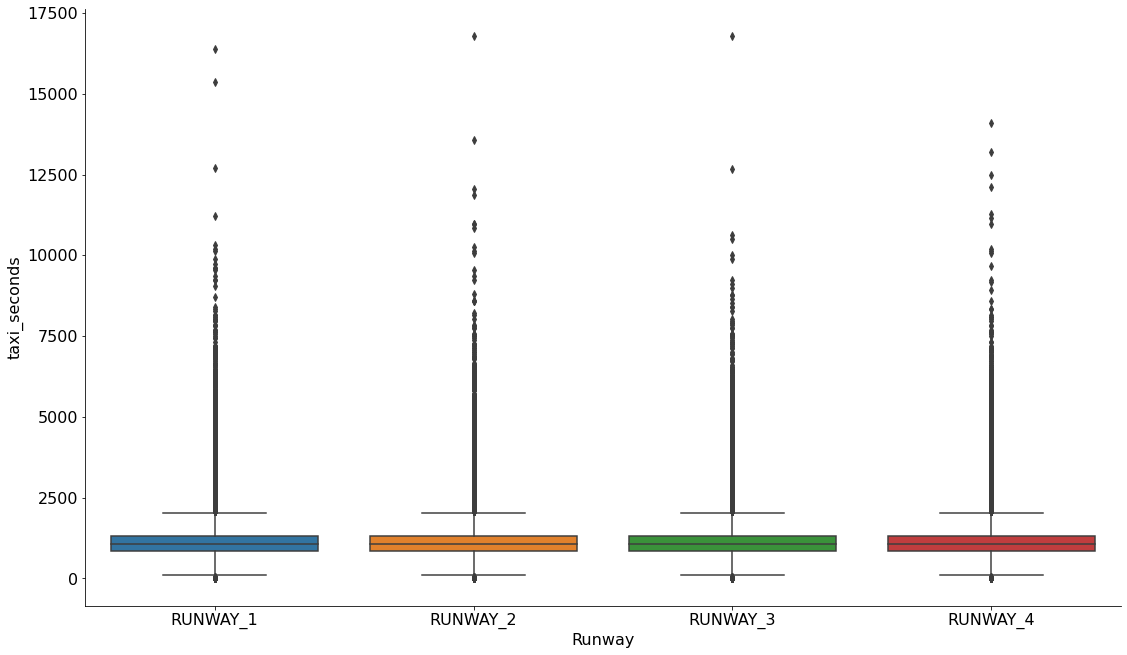

In [203]:
order = train["Runway"].unique()
order.sort()
g= sns.catplot(x="Runway", y = "taxi_seconds",kind="box", data = train, order = order)
g.fig.set_size_inches(20,10)

<AxesSubplot:>

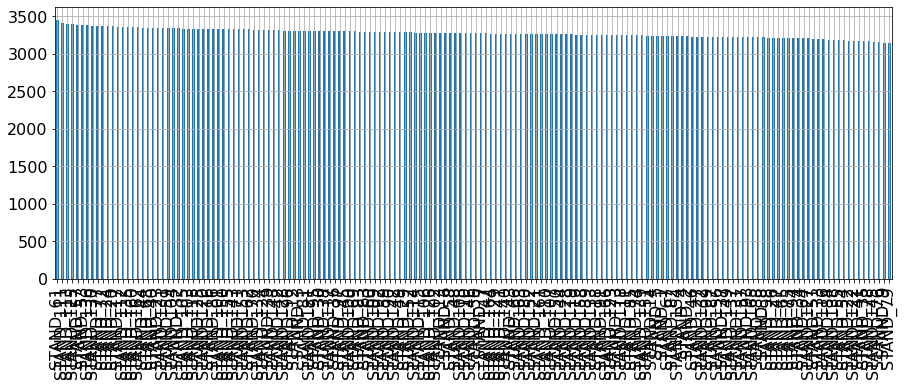

In [193]:
# Distribution of stand
train['Stand'].value_counts().plot(kind="bar", figsize=(15, 5), grid=True)

## Continuous variables

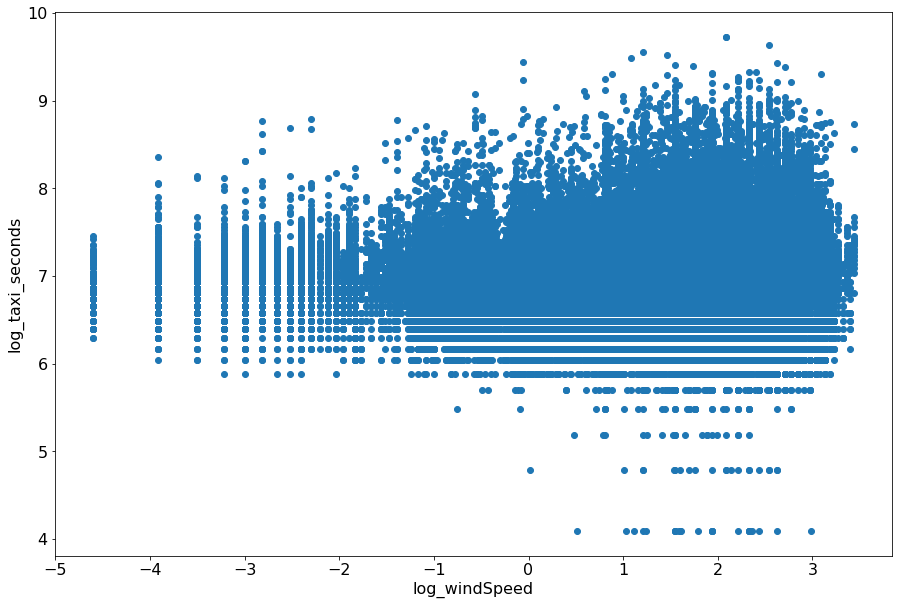

In [220]:
# Wind speed against taxi seconds
train['log_windSpeed']= np.log(train['windSpeed'])
train['log_taxi_seconds']= np.log(train['taxi_seconds'])
plt.figure(figsize=(15,10))
plt.scatter(train['log_windSpeed'],train['log_taxi_seconds'])
plt.xlabel('log_windSpeed')
plt.ylabel('log_taxi_seconds')
plt.show()

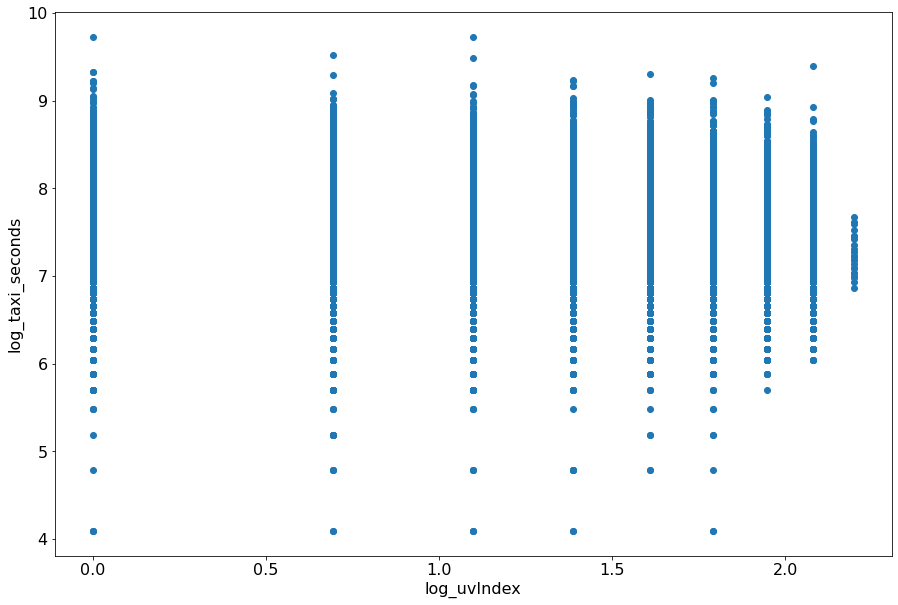

In [222]:
# uv index against taxi seconds
train['log_uvIndex']= np.log(train['uvIndex'])
train['log_taxi_seconds']= np.log(train['taxi_seconds'])
plt.figure(figsize=(15,10))
plt.scatter(train['log_uvIndex'],train['log_taxi_seconds'])
plt.xlabel('log_uvIndex')
plt.ylabel('log_taxi_seconds')
plt.show()